[Reference Towards DataScience](https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c)

Hello, let me tell you about my project, it's based on sentiments, we are using supervised learning technique called classification here, with the help of sklearn Naive Bayes Classifier and Random Forest We gonna Classify which sentiment is good or which one is negative

In [2]:
#required libs

import pandas as pd 
from pandas import DataFrame
import matplotlib.pyplot as plt
plt.rcParams['text.color'] = 'white'
import warnings

warnings.filterwarnings('ignore')

In [3]:
# Required Sklearn functions 

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import scikitplot as skplt
from sklearn.metrics import classification_report

In [4]:
"""
    Reading all the files from file path and returning them into one single dataframe with source name from where they belongs
"""
files={'yelp':'yelp_labelled.txt',
       'amazon':'amazon_cells_labelled.txt',
       'imdb':'imdb_labelled.txt'}


df_list=[]
for k,v in files.items():
    path= r'C:/Users/rahul/Videos/Sentimental_Analysis/'+v
    
    df = pd.read_csv(path,names=['sentence','label'],sep='\t')
    df['source']=k
    df_list.append(df)
df = pd.concat(df_list)


In [5]:
# 5 rows from dataframe

df.head()

,sentence,label,source
0,Wow... Loved this place.,1,yelp
1,Crust is not good.,0,yelp
2,Not tasty and the texture was just nasty.,0,yelp
3,Stopped by during the late May bank holiday of...,1,yelp
4,The selection on the menu was great and so wer...,1,yelp


In [6]:
# renaming col

df.rename(columns={'sentence':'reviews'}, inplace=True)

In [7]:
#converting reviews cols into lower case

df['reviews_lowercase'] = df.loc[:,'reviews'].str.lower()

In [8]:
# droping reviews cols, now on we will use lowercase data

df.drop('reviews', axis=1, inplace=True)

In [9]:
"""
    We are using string library from it's we imported punctuation, 
    we gonna apply this to our lowercase converted dataframe

    Returns:
        it will return us a new col with more clear data, removing all puntuation, this punctuation does not add any meaning to our data
        
"""

import string
punct = string.punctuation
print(punct)

def remove_puntuations(text):
    return text.translate(str.maketrans('','',punct))

df['final_data'] = df['reviews_lowercase'].apply(remove_puntuations)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [10]:
# Droping lower case col, from now we will use only lowercase + puntuation removed data

df.drop('reviews_lowercase', axis=1, inplace=True)

In [11]:
# data after cleaning

df.head()

,label,source,final_data
0,1,yelp,wow loved this place
1,0,yelp,crust is not good
2,0,yelp,not tasty and the texture was just nasty
3,1,yelp,stopped by during the late may bank holiday of...
4,1,yelp,the selection on the menu was great and so wer...


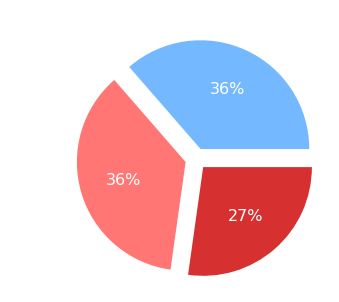

In [12]:
# Pie plot to show distribution


categories = ['yelp', 'amazon', 'imdb']
size = df['source'].value_counts()


explode = (0.1, 0.1, 0.1)
custom_colors = ['#74b9ff', '#ff7675', '#d63031']



plt.figure(figsize=(5,5))
plt.pie(size, autopct='%1.0f%%', explode=explode, labels=categories, textprops={'fontsize' : 16}, colors=custom_colors)
plt.title("Distribution of data")
plt.show()

In [13]:
    """
    removing all the stop words from our data, like (is, are, you) and many more, 
    which does not add any value to our dataset, return all dataset into words in a form of matrix
    """

vectorizer = CountVectorizer(stop_words='english')

In [14]:
#fitting data to remove stop words

all_features = vectorizer.fit_transform(df.final_data)

In [15]:
# shape of data from vectorizer

all_features.shape

(2748, 5118)

In [16]:
# Splitting data into training and test data set

x_train, x_test, y_train, y_test = train_test_split(all_features, df.label, test_size = 0.20, random_state=100)

In [17]:
# imported Multinomial Naive Bayes from Sk learn 

classifier = MultinomialNB()

In [18]:
# fitting traing data into model

classifier.fit(x_train, y_train)

MultinomialNB()

In [19]:
#checking the correct classified sentences from classifier

nr_correct = (y_test == classifier.predict(x_test)).sum()

In [20]:
# total correct classified sentences

print(f'{nr_correct} sentences classified correctly')

448 sentences classified correctly


In [21]:
# Number of sentences incorrectly classified is 

nr_incorrect = y_test.size - nr_correct

print(f'Number of sentences incorrectly classified is {nr_incorrect}')

Number of sentences incorrectly classified is 102


In [22]:
# The accuracy of the model

fraction_of_wrong = nr_incorrect / (nr_correct + nr_incorrect)

print(f'The (testing) accuracy of the model is {1-fraction_of_wrong:.2%}')

The (testing) accuracy of the model is 81.45%


In [23]:
#checking score with sklearn 

print(f'The Accuracy Score on test data {classifier.score(x_test, y_test):.2%}')

The Accuracy Score on test data 81.45%


In [24]:
# storing prediction from training data into pred
pred = classifier.predict(x_test)

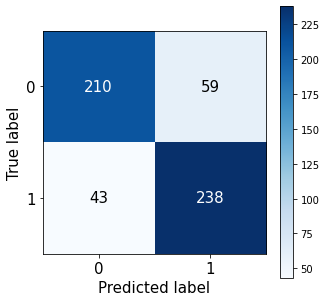

In [25]:
#plotting confusion matrix, which tell us about true negative and true positive, false negative and false positive

skplt.metrics.plot_confusion_matrix(y_test, pred, figsize=(5,5), title_fontsize=(10), text_fontsize=(15))
plt.show()

In [26]:
    """
    Random Forest Classifier from sklearn, fitting same training data using count vectorizer 
    
    """

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini')
rf.fit(x_train, y_train)

RandomForestClassifier()

In [27]:
#The Accuracy Score on test data using random forest classifier

print(f'The Accuracy Score on test data using random forest classifier {rf.score(x_test, y_test):.2%}')

The Accuracy Score on test data using random forest classifier 79.27%


In [28]:
#classification_report

y_pred_rf = rf.predict(x_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       269
           1       0.82      0.76      0.79       281

    accuracy                           0.79       550
   macro avg       0.79      0.79      0.79       550
weighted avg       0.79      0.79      0.79       550



In [29]:
rf_correct = (y_test == rf.predict(x_test)).sum()
print(f'{rf_correct} sentences classified correctly')

436 sentences classified correctly


In [30]:
rf_incorrect = y_test.size - rf_correct

print(f'Number of sentences incorrectly classified is {rf_incorrect}')

Number of sentences incorrectly classified is 114


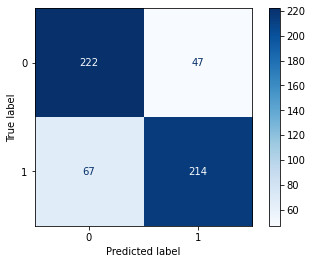

In [31]:
# plotting confusion metrics which tell us about true positive, true negatice, false positive and false negative

from sklearn import metrics
metrics.plot_confusion_matrix(rf, x_test, y_test, cmap='Blues')
plt.show()

In [32]:
# test case using naive bayes

example = ['i hate you',
           'i love you',
          'i hate america',
          'i hate everyone',
          'product is bad',
          'not all bad',
          'boom boom hate',
          'this new movie ']


doc_to_word_mat = vectorizer.transform(example)
classifier.predict(doc_to_word_mat)

array([0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [33]:
# test case using random forest

example = ['i hate you',
           'i love you',
          'i hate america',
          'i hate everyone',
          'product is bad',
          'not all bad',
          'boom boom hate']


doc_to_word_mat = vectorizer.transform(example)
rf.predict(doc_to_word_mat)

array([0, 1, 0, 0, 0, 0, 0], dtype=int64)